In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**MODEL BUILDING**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense,Flatten,Dropout
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
base_model=InceptionV3(input_shape=(256,256,3),
                       include_top=False
                       )

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
X=Flatten()(base_model.output)
X=Dense(1024,activation='relu')(X)
X=Dropout(0.2)(X)
X=Dense(units=2,activation='sigmoid')(X)

model=Model(base_model.input,X)
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization[0][0

In [ ]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

**Pre-Process data using Data Generator**

In [ ]:
train_datagen=ImageDataGenerator(#featurewise_center=True,
                                 rotation_range=0.4,
                                 width_shift_range=0.3,
                                 horizontal_flip=True,
                                 preprocessing_function=preprocess_input,
                                 zoom_range=0.4,
                                 shear_range=0.4)
train_data=train_datagen.flow_from_directory(directory='/content/gdrive/MyDrive/new/DATASET-2/train',
                                             target_size=(256,256),
                                             batch_size=32)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,)
val_data=test_datagen.flow_from_directory(directory='/content/gdrive/MyDrive/new/data/test',
                                             target_size=(256,256),
                                             batch_size=32)


Found 5090 images belonging to 2 classes.
Found 339 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'elephant': 0, 'non_elephant': 1}

In [ ]:
val_data.class_indices

{'elephant': 0, 'non_elephant': 1}

**Visualizing the data**

In [ ]:
t_img,label=train_data.next()

In [ ]:
t_img.shape

(32, 256, 256, 3)

In [ ]:
def plotImage(img_arr,label):
  for idx,img in enumerate(img_arr):

    if idx <=5:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis=False
      plt.show()


In [ ]:
plotImage(t_img,label)

**Model checkpoint**

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
mc=ModelCheckpoint(filepath="./gdrive/MyDrive/new/best_model1.h5",
                   monitor="val_accuracy",
                   verbose=2,
                   save_best_only=True
                   )
es=EarlyStopping(monitor="val_accuracy",
                 min_delta=0.01,
                 patience=5,
                 verbose=2)
cb=[mc,es]

In [ ]:
his=model.fit_generator(train_data,
                        validation_data=val_data,
                        steps_per_epoch=5,
                        epochs=10,
                        # verbose=2,
                        callbacks=cb)

<ipython-input-19-19b354b0b5fd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=model.fit_generator(train_data,


Epoch 1/10
5/5 [==============================] - ETA: 0s - loss: 28.0440 - accuracy: 0.6438 
Epoch 1: val_accuracy improved from -inf to 0.86431, saving model to ./gdrive/MyDrive/new/best_model1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 226s 50s/step - loss: 28.0440 - accuracy: 0.6438 - val_loss: 6.3870 - val_accuracy: 0.8643
Epoch 2/10
5/5 [==============================] - ETA: 0s - loss: 5.3733 - accuracy: 0.8875
Epoch 2: val_accuracy improved from 0.86431 to 0.95575, saving model to ./gdrive/MyDrive/new/best_model1.h5
5/5 [==============================] - 155s 34s/step - loss: 5.3733 - accuracy: 0.8875 - val_loss: 1.0830 - val_accuracy: 0.9558
Epoch 3/10
5/5 [==============================] - ETA: 0s - loss: 5.3787 - accuracy: 0.8462
Epoch 3: val_accuracy did not improve from 0.95575
5/5 [==============================] - 122s 26s/step - loss: 5.3787 - accuracy: 0.8462 - val_loss: 3.8331 - val_accuracy: 0.8909
Epoch 4/10
5/5 [==============================] - ETA: 0s - loss: 4.0356 - accuracy: 0.8500
Epoch 4: val_accuracy did not improve from 0.95575
5/5 [==============================] - 138s 30s/step - loss: 4.0356 - accuracy: 0.8500 - val_loss: 0.9203 - val_accuracy: 0.94

In [ ]:
from keras.models import load_model
model=load_model("./gdrive/MyDrive/new/best_model1.h5")

In [ ]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
val_class_indices = val_data.classes

# Convert the class indices to original class labels
class_labels = {v: k for k, v in val_data.class_indices.items()}
val_original_labels = [class_labels[idx] for idx in val_class_indices]

print("Original labels of validation data:")
print(val_original_labels)

Original labels of validation data:
['elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'el

In [ ]:
y_preds = model.predict_generator(val_data)

<ipython-input-55-aadc666247b8>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_preds = model.predict_generator(val_data)


In [ ]:
y_preds

array([[1.00000000e+00, 0.00000000e+00],
       [5.94057876e-12, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [6.79625627e-12, 1.00000000e+00],
       [1.00000000e+00, 4.61193076e-26],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.12124825e-08, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [2.27316260e-20, 1.00000000e+00],
       [2.80828268e-16, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.69137699e-08, 1.00000000e+00],
       [1.00000000e+00, 1.72688609e-19],
       [6.33092277e-18, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.27491842e-06, 1.00000000e+00],
       [7.54851842e-14, 1.00000000e+00],
       [3.52006792e-11, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [2.28424685e-19, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [8.785355

In [ ]:
y_pred_classes = [np.argmax(element) for element in y_preds]

In [ ]:
y_pred_classes = ["elephant" if x == 0 else "non_elephant" for x in y_pred_classes]

In [ ]:
y_pred_classes

In [ ]:
from sklearn.metrics import classification_report

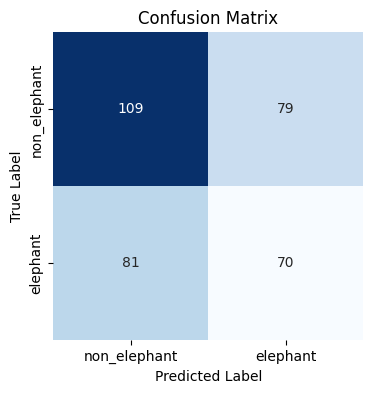

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_classes are your true and predicted labels
# Replace these with your actual data
y_true = val_original_labels
y_pred = y_pred_classes

# Convert numerical labels to string labels
# y_true_str = ["non_elephant" if label == 0 else "elephant" for label in y_true]
# y_pred_str = ["non_elephant" if label == 0 else "elephant" for label in y_pred]

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["non_elephant", "elephant"],
            yticklabels=["non_elephant", "elephant"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
model.evaluate(val_data)

11/11 [==============================] - 66s 5s/step - loss: 0.5898 - accuracy: 0.9882


[0.5897971987724304, 0.9882006049156189]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming model, val_data, and class_labels are defined
# Make predictions on the validation data
y_pred = model.predict(val_data)

# Convert predicted probabilities to class labels using argmax
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels from val_data
y_true = val_data.classes

# Map class indices to class labels
class_labels = {v: k for k, v in val_data.class_indices.items()}
y_true_labels = [class_labels[idx] for idx in y_true]
y_pred_labels = [class_labels[idx] for idx in y_pred_classes]

# Generate confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels))


11/11 [==============================] - 58s 5s/step
Confusion Matrix:
[[109  79]
 [ 81  70]]
Classification Report:
              precision    recall  f1-score   support

    elephant       0.57      0.58      0.58       188
non_elephant       0.47      0.46      0.47       151

    accuracy                           0.53       339
   macro avg       0.52      0.52      0.52       339
weighted avg       0.53      0.53      0.53       339



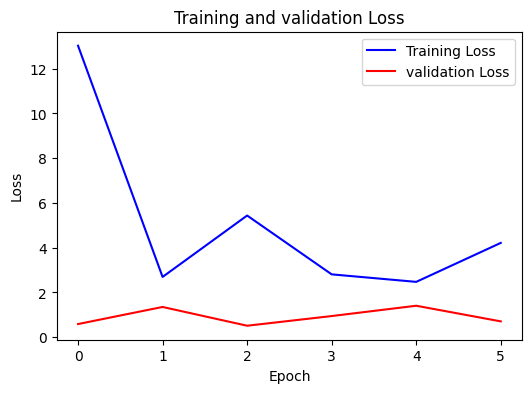

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(his.history['loss'], label='Training Loss',c='blue')
plt.plot(his.history['val_loss'], label='validation Loss',c='red')
plt.title('Training and validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Set x-axis ticks with a specific range and increment
plt.xticks(range(0, 6, 1))  # 1 to 20 with +1 increment

plt.legend()
plt.show()

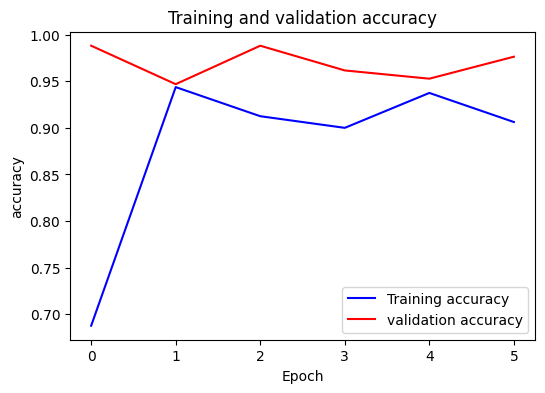

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(his.history['accuracy'], label='Training accuracy',c='blue')
plt.plot(his.history['val_accuracy'], label='validation accuracy',c='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')

# Set x-axis ticks with a specific range and increment
plt.xticks(range(0, 6, 1))  # 1 to 20 with +1 increment

plt.legend()
plt.show()

<ipython-input-68-02368fdf02b0>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(h['accuracy'],'go--',c='blue',)


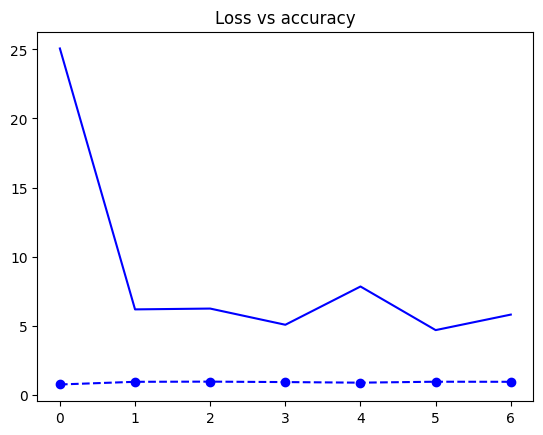

In [ ]:
plt.plot(h['loss'],c='blue')
plt.plot(h['accuracy'],'go--',c='blue',)
plt.title("Loss vs accuracy")
plt.show()

<ipython-input-69-166f82a32acc>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(h['val_accuracy'],'go--',c='red',)


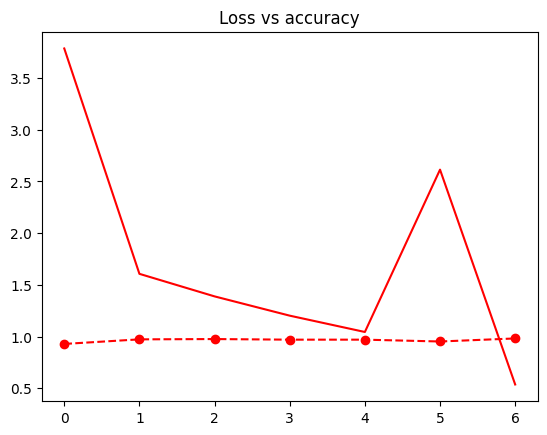

In [ ]:
plt.plot(h['val_loss'],c='red')
plt.plot(h['val_accuracy'],'go--',c='red',)
plt.title("Loss vs accuracy")
plt.show()

Validation

In [ ]:
# from keras.preprocessing.image import load_img,img_to_array

In [ ]:
def hello(path):
  img = tf.keras.utils.load_img(path,target_size=(256,256))
  i = tf.keras.utils.img_to_array(img)
  # img=load_img(path,target_size=(256,256))
  # i=img_to_array(img)
  i=preprocess_input(i)
  input_arr=np.array([i])
  input_arr.shape
  pred=np.argmax(model.predict(input_arr))
  if(pred==0):
    print("this is elephant")
  else:
    print("this is non elephant")

  plt.imshow(input_arr[0])
  plt.title("input image")
  plt.show()

1/1 [==============================] - 2s 2s/step


this is elephant


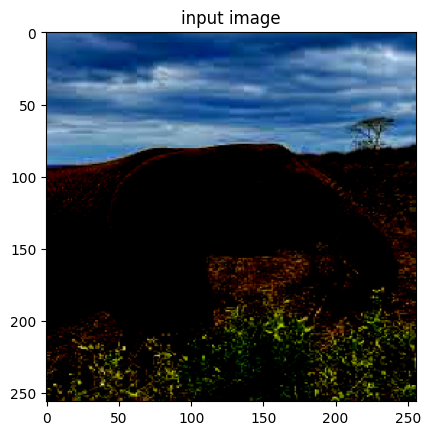

In [ ]:
hello("/content/gdrive/MyDrive/new/data/test/elephant/af_te12.jpg")

1/1 [==============================] - 0s 445ms/step


this is non elephant


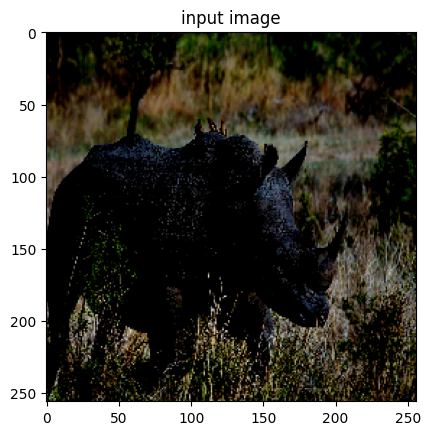

In [ ]:
hello("/content/003.jpg")

1/1 [==============================] - 1s 834ms/step


this is non elephant


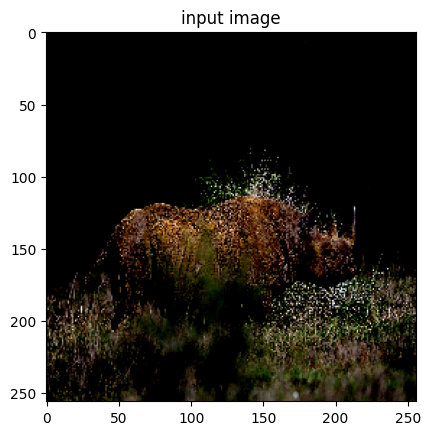

In [ ]:
hello("/content/007.jpg")

1/1 [==============================] - 0s 341ms/step


this is elephant


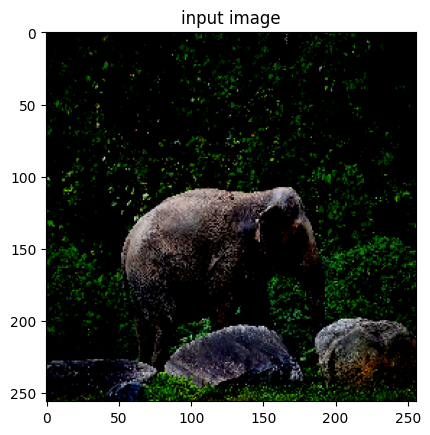

In [ ]:
hello("/content/8c2d171b9d.jpg")

1/1 [==============================] - 0s 311ms/step


this is elephant


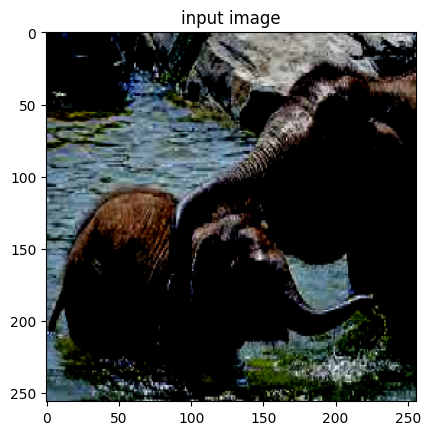

In [ ]:
hello("/content/8d9950ed68.jpg")

1/1 [==============================] - 0s 313ms/step


this is non elephant


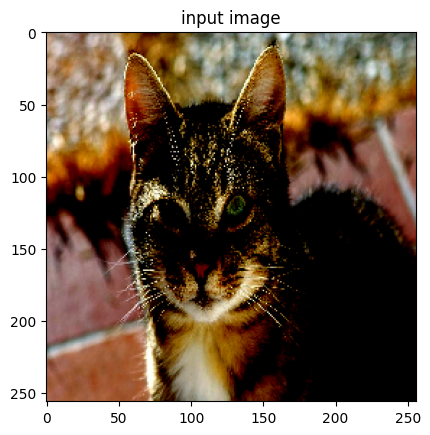

In [ ]:
hello("/content/A-Cat.jpg")

1/1 [==============================] - 1s 729ms/step


this is elephant


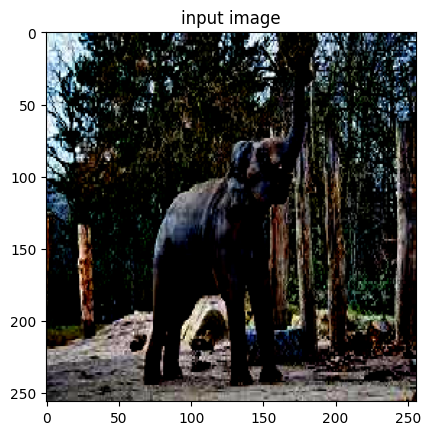

In [ ]:
hello("/content/as_tr208.jpeg")

1/1 [==============================] - 0s 413ms/step


this is non elephant


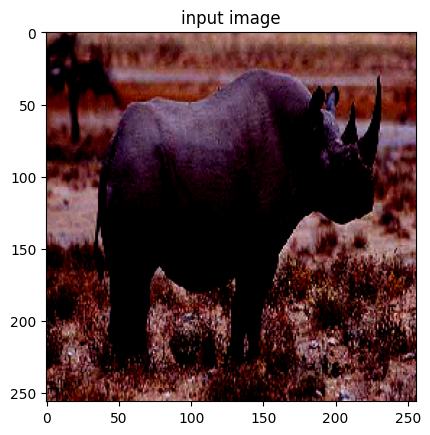

In [ ]:
hello("/content/buffalo.jpg")

1/1 [==============================] - 0s 349ms/step


this is non elephant


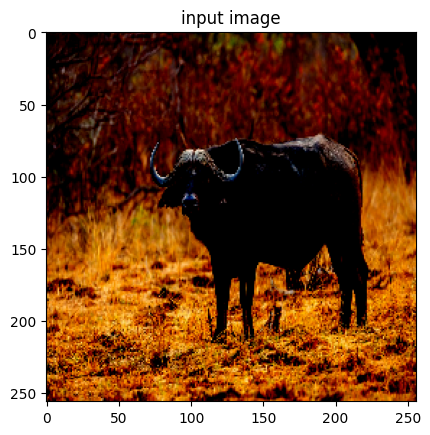

In [ ]:
hello("/content/buffalo1.jpg")

1/1 [==============================] - 1s 695ms/step


this is non elephant


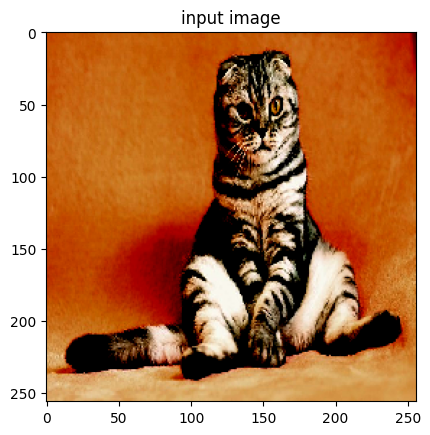

In [ ]:
hello("/content/cat.jpg")

1/1 [==============================] - 0s 351ms/step


this is non elephant


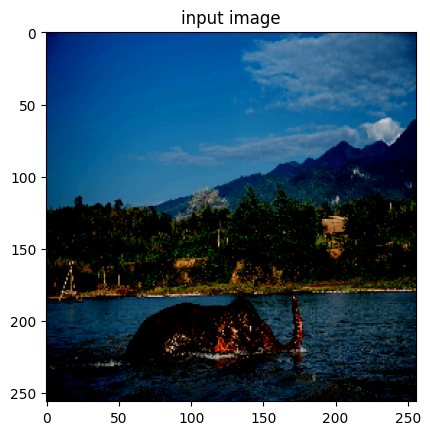

In [ ]:
hello("/content/elephant3.jpg")

1/1 [==============================] - 0s 289ms/step


this is elephant


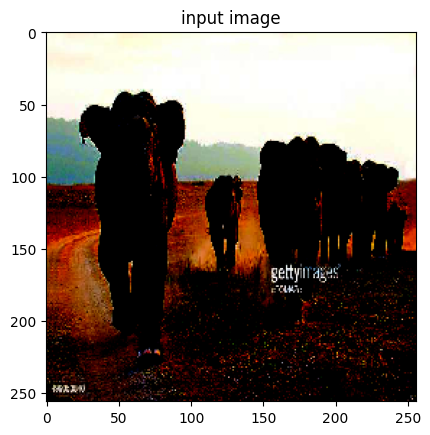

In [ ]:
hello("/content/elephants1.jpg")

1/1 [==============================] - 0s 213ms/step


this is elephant


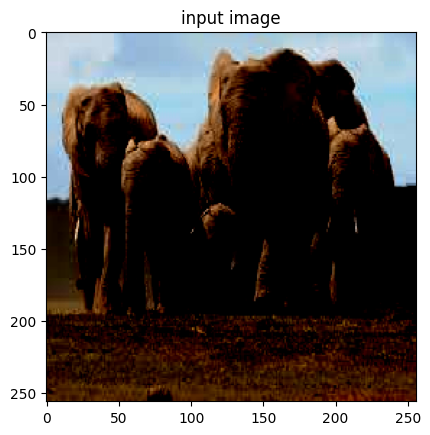

In [ ]:
hello("/content/elephants2.jpg")

1/1 [==============================] - 0s 413ms/step


this is non elephant


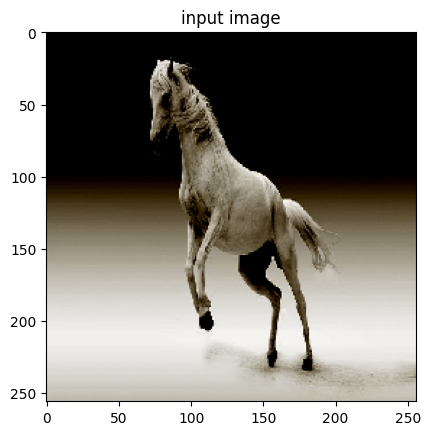

In [ ]:
hello("/content/horse1.jpg")

1/1 [==============================] - 0s 365ms/step


this is non elephant


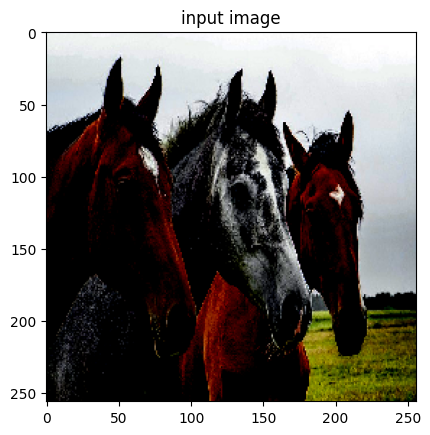

In [ ]:
hello("/content/horses2.jpg")

1/1 [==============================] - 0s 236ms/step


this is non elephant


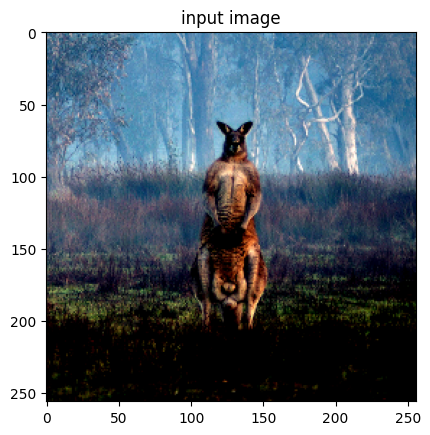

In [ ]:
hello("/content/kangaroo-72.jpg")

1/1 [==============================] - 1s 551ms/step


this is non elephant


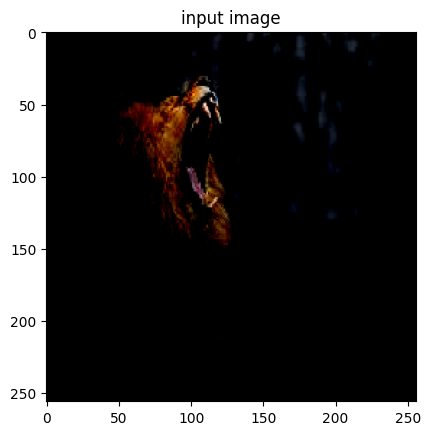

In [ ]:
hello("/content/lion1.jpg")

1/1 [==============================] - 0s 401ms/step


this is non elephant


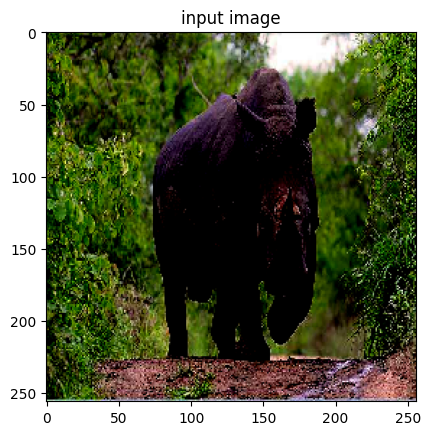

In [ ]:
hello("/content/rhino.jpg")

1/1 [==============================] - 0s 435ms/step


this is non elephant


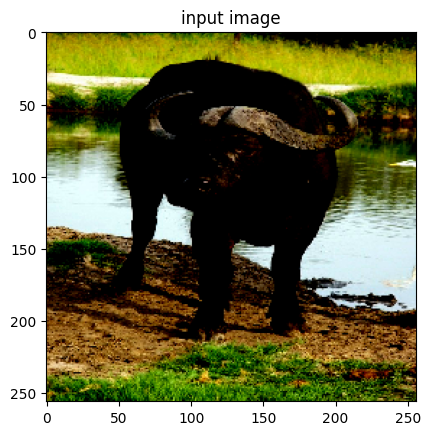

In [ ]:
hello("/content/water_buffalo_africa_animal_220184.jpg")

1/1 [==============================] - 0s 292ms/step


this is elephant


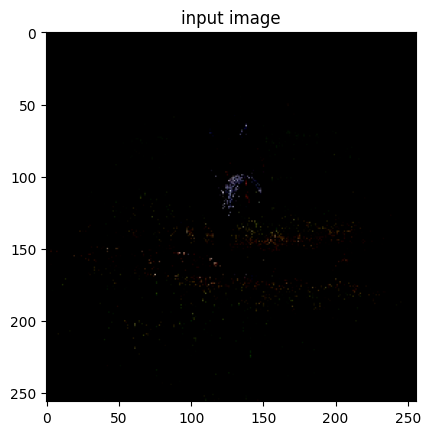

In [ ]:
hello("/content/gdrive/MyDrive/new/data/test/elephant/as_te27.jpg")

1/1 [==============================] - 0s 363ms/step


this is elephant


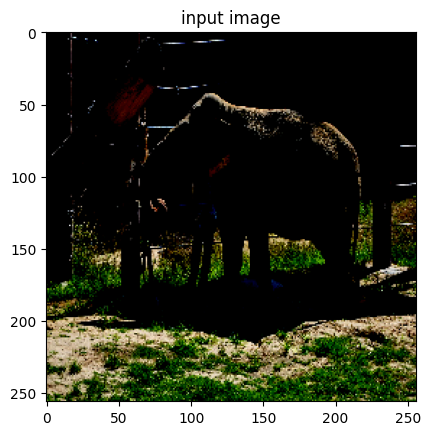

In [ ]:
hello("/content/gdrive/MyDrive/new/data/test/elephant/as_te6.jpg")

1/1 [==============================] - 0s 364ms/step


this is elephant


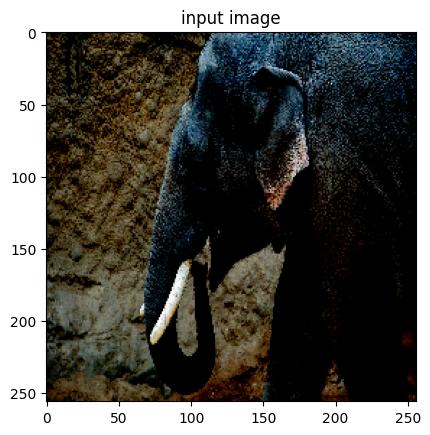

In [ ]:
hello("/content/gdrive/MyDrive/new/data/test/elephant/as_te99.jpg")

1/1 [==============================] - 0s 358ms/step


this is non elephant


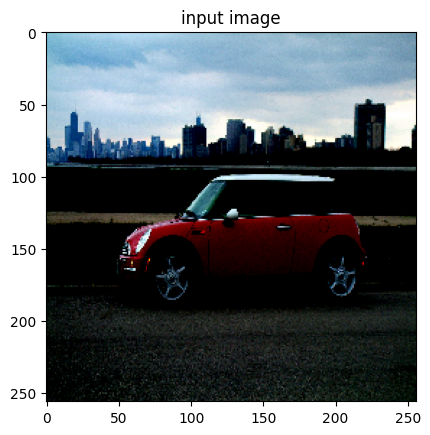

In [ ]:
hello("/content/gdrive/MyDrive/new/data/test/non_elephant/Image_71.jpg")

1/1 [==============================] - 1s 636ms/step


this is non elephant


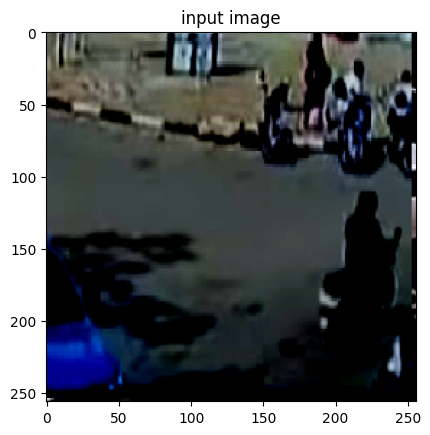

In [ ]:
hello("/content/gdrive/MyDrive/new/data/test/non_elephant/481.png")

1/1 [==============================] - 1s 672ms/step


this is non elephant


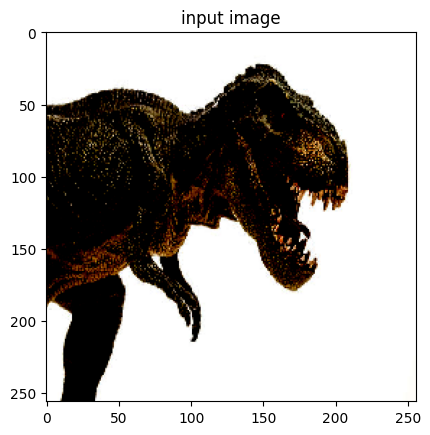

In [ ]:
hello("/content/dino.jpg")

1/1 [==============================] - 0s 379ms/step


this is non elephant


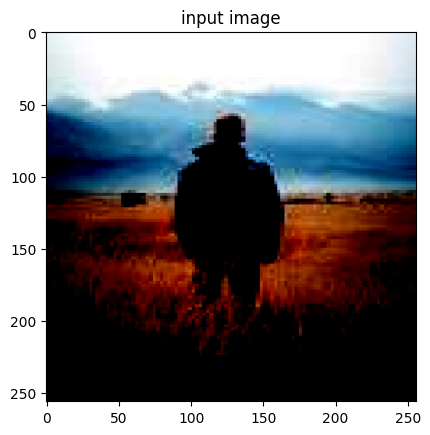

In [ ]:
hello("/content/man.jpeg")

**Grad Cam**

In [ ]:
def get_img_arr(img_path):
  img = tf.keras.utils.load_img(path,target_size=(256,256))
  img= tf.keras.utils.img_to_array(img)
  img=preprocess_input(img)
  img=np.array([img])
  return img


In [ ]:
def make_gracam_heatmap(img_arr,model,last_conv_layer_name,pred_index=None):
  grad_model=tf.keras.models.Model(
      [model.input],[model.get_layer(last_conv_layer_name).output,model.output]
  )
  with tf.GradientTape() as tape:
    last_conv_layer_output,preds=grad_model(img_arr)
    if pred_index is None:
      pred_index=tf.argmax(preds[0])
    class_channel=preds[:,pred_index]
  grads=tape.gradient(class_channel,last_conv_layer_output)
  pooled_grads=tf.reduce_mean(grads,axis=(0,1,2))
  last_conv_layer_output=last_conv_layer_output[0]
  heatmap=last_conv_layer_output @ pooled_grads[...,tf.newaxis]
  heatmap=tf.squeeze(heatmap)
  heatmap=tf.maximum(heatmap,0)/tf.math.reduce_max(heatmap)
  return heatmap.numpy()


mask heatmap on image

In [ ]:
import matplotlib.cm as cm
from IPython.display import Image,display

In [ ]:
def save_and_display_gradcam(img_path,heatmap,cam_path='cam.jpg',alpha=0.4):


  img=tf.keras.utils.img_to_array(tf.keras.utils.load_img(img_path,target_size=(256,256)))
  heatmap=np.uint8(255*heatmap)
  print("Image shape:", img.shape)
  print("Heatmap shape:", heatmap.shape)
  jet=cm.get_cmap("jet")
  jet_colors=jet(np.arange(256))[:,:3]
  jet_heatmap=jet_colors[heatmap]

  jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
  # jet_heatmap=get_img_arr(jet_heatmap)
  jet_heatmap=jet_heatmap.resize((img.shape[1],img.shape[0]))
  # jet_heatmap=get_img_arr(jet_heatmap)
  jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)

  superimposed_img=jet_heatmap*alpha+img
  # superimposed_img=get_img_arr(superimposed_img)
  superimposed_img = tf.keras.utils.array_to_img(superimposed_img)
  superimposed_img.save(cam_path)
  display(Image(cam_path))

In [ ]:
# from keras.api._v2.keras.utils import img_to_array
def image_prediction_and_visualization(path,last_conv_layer_name='conv2d_188',model=model):
  # img = tf.keras.utils.load_img(path,target_size=(256,256))
  # img_array=tf.keras.utils.img_to_array(img)
  # img_array=np.expand_dims(img_array,axis=0)

  img_array = get_img_arr(path)

  heatmap=make_gracam_heatmap(img_array,model,last_conv_layer_name)
  plt.imshow(heatmap)
  # plt.title("input image")
  # plt.show()
  pred=np.argmax(model.predict(preprocess_input(img_array)))
  if(pred==0):
    print("this is elephant")
  else:
    print("this is non elephant")
  print("image with heatmap")
  save_and_display_gradcam(path,heatmap)
  a=plt.imread(path)
  plt.imshow(a,cmap='gray')
  plt.title('original image')
  plt.show()

1/1 [==============================] - 0s 374ms/step
this is non elephant
image with heatmap
Image shape: (256, 256, 3)
Heatmap shape: (127, 127)


<ipython-input-102-cbc9a78c6ca8>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet=cm.get_cmap("jet")


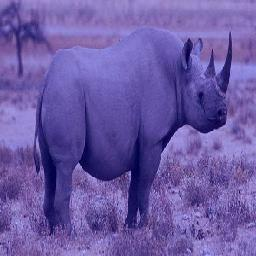

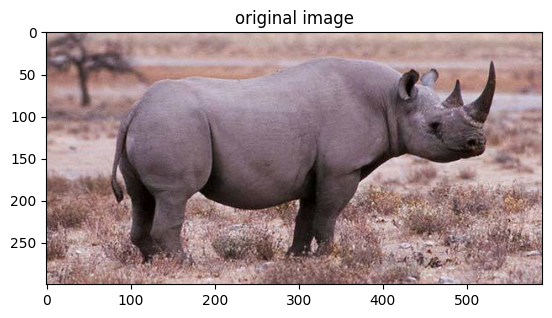

In [ ]:
path="/content/buffalo.jpg"
image_prediction_and_visualization(path)

streamlit

In [ ]:
import streamlit as st
from PIL import Image
import tensorflow as tf
import numpy as np





model_path = 'best_model.h5'
model = tf.keras.models.load_model(model_path)

emotion_classes = ['Angry', 'Happy', 'Relaxed', 'Sad']

def predict_emotion(image_file):
    img = Image.open(image_file)
    img = img.resize((128, 128))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_emotion = emotion_classes[predicted_class_index]
    confidence = predictions[0][predicted_class_index]
    return predicted_emotion, confidence


st.title("Dog Emotion Classification App")
st.write("Upload an image to predict the emotion.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)


    predicting_placeholder = st.empty()
    predicting_placeholder.write("Predicting...")

    predicted_emotion, confidence = predict_emotion(uploaded_file)


    predicting_placeholder.empty()
    st.subheader("Prediction Result")
    st.write(f"Predicted Emotion: {predicted_emotion}")
    st.write(f"Confidence: {confidence:.2f}")
else:
    st.write("Please upload an image.")

st.write("NOTE: This is only for Educational Purpose")
st.write("<span style='font-size: 15px;'>Founder: Santhosh Reddy Padala</span>", unsafe_allow_html=True)